1. unsupervised
2. dimensionality reduction
3. visualization
4. noise filtering
5. feature extraction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
rng=np.random.RandomState(1)
X=np.dot(rng.rand(2,2),rng.randn(2,200)).T 
X.shape

(200, 2)

create a random matrix (200,2). 
Those points will distribute as a line, becauese the second matrix were multipled by the same matrix, rng.rand(2,2). 
That gives them relationship like below. 

(-2.729271205627196, 2.570274439335261, -0.9326181575178751, 1.004413830229183)

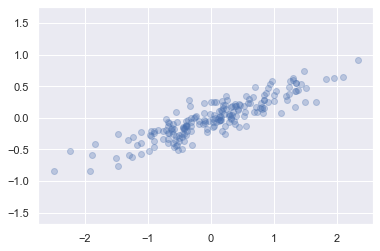

In [9]:
plt.scatter(X[:,0],X[:,1],alpha=0.3)
plt.axis('equal') #equal scaling

linear regression --> predict, 
PCA --> find a list of the 'principal axes' --> describe the dataset (p.434)

In [10]:
from sklearn.decomposition import PCA

In [11]:
PCA?

In [12]:
pca=PCA(n_components=2) # Number of components to keep.
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [37]:
print(pca.components_[0]) 
#Principal axes in feature space, representing the directions of maximum variance in the data.

[-0.94446029 -0.32862557]


In [14]:
print(pca.explained_variance_)
#The amount of variance explained by each of the selected components.

[0.7625315 0.0184779]


In [33]:
pca.mean_

array([ 0.03351168, -0.00408072])

In [41]:
pca.mean_+pca.components_[0]*pca.explained_variance_[0]

array([-0.68666904, -0.25466807])

In [29]:
for length ,vector in zip(pca.explained_variance_,pca.components_):
    print(length)
    print(vector)

0.7625315008826112
[-0.94446029 -0.32862557]
0.018477895513562572
[-0.32862557  0.94446029]


In [79]:
def draw_vector(v0,v1,ax=None):
    ax= ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                   linewidth=2,
                   shrinkA=0,
                   shrinkB=0)
    ax.annotate('',v1,v0,arrowprops=arrowprops) #plt.annotate(s, xy, *args, **kwargs)

[-2.47419458 -0.86089761]
[-0.1340136   0.38515116]


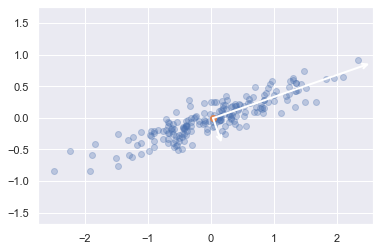

In [107]:
plt.scatter(X[:,0],X[:,1],alpha=0.3)
plt.axis('equal') #equal scaling, very important to see the vertical vectors
plt.scatter(pca.mean_[0],pca.mean_[1])
for length, vector in zip(pca.explained_variance_,pca.components_):
    v=vector*3*np.sqrt(length) #we use sqrt to convert varince to std, mlutiple 3 means 3 std.
    print(v)
    draw_vector(pca.mean_,pca.mean_-v)

In [83]:
pca.components_[0]*3*np.sqrt(pca.explained_variance_[0])

array([-2.47419458, -0.86089761])

In [109]:
np.sqrt(pca.explained_variance_[1])

0.13593342309219825

In [111]:
pca.components_[1]

array([-0.32862557,  0.94446029])

In [112]:
pca.components_[1]*3*0.13593342309219825

array([-0.1340136 ,  0.38515116])

another way to draw the principle axis

[-2.47419458 -0.86089761]
[-0.1340136   0.38515116]


(-2.729271205627196, 2.570274439335261, -0.9540455921075564, 1.005434184257263)

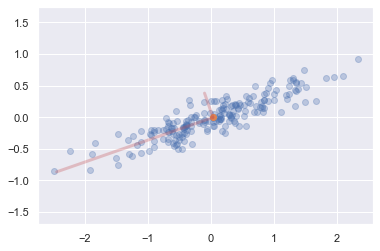

In [124]:
plt.scatter(X[:,0],X[:,1],alpha=0.3)
plt.scatter(pca.mean_[0],pca.mean_[1])
v0= pca.components_[0]*3*np.sqrt(pca.explained_variance_[0])
print(v0)
v0=pca.mean_+v0
plt.plot([pca.mean_[0],v0[0]],[pca.mean_[1],v0[1]],c='r',alpha=0.3,linewidth=3)
v1= pca.components_[1]*3*np.sqrt(pca.explained_variance_[1])
print(v1)
v1=pca.mean_+v1
plt.plot([pca.mean_[0],v1[0]],[pca.mean_[1],v1[1]],c='r',alpha=0.3,linewidth=3)
plt.axis('equal')

1. vectors means 'priciple axes'
2. length (variance) means how important the axis is, the variance of the data when projected onto the axis (p.435)
3. the projection of the data on the axes are the 'priciple components' of the data.